## 5 Phoneme Recognition with Deep Neural Networks

In [1]:
import pickle
import torch
import matplotlib.pyplot as plt
import numpy as np

from models.load_data import MFCCDataModule
from models.trainer import Trainer
from models.model import DNN

In [2]:
with open('stateList.pkl', 'rb') as file:
    stateList = pickle.load(file)

In [3]:
def plot_loss_acc(train_losses, val_losses, train_accuracies, val_accuracies, title=None):
    # Plot Loss
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    if val_losses:
        plt.plot(val_losses, label='Validation Loss')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training & Validation Loss")
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Accuracy')
    if val_accuracies:
        plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Training & Validation Accuracy")
    plt.legend()

    if title:
        plt.suptitle(title, fontsize=14)

    plt.tight_layout()
    plt.show()

In [4]:
def run_experiment(data,
                   output_dim,
                   title=None,
                   save_path=None,
                   epochs=10,
                   batch_size=512,
                   learning_rate=1e-3,
                   weight_decay=1e-4,):

    data_module = MFCCDataModule(data, output_dim, batch_size=batch_size)
    train_loader, val_loader, test_loader = data_module.get_dataloaders()

    input_dim = data_module.input_dim

    dnn_model = DNN(input_dim, output_dim)

    optimizer = torch.optim.Adam(dnn_model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    trainer = Trainer(model=dnn_model, optimizer=optimizer, path=save_path)
    train_losses, val_losses, train_accuracies, val_accuracies = trainer.train(train_loader, val_loader, epochs=epochs)

    if save_path:
        trainer.save_model()

    # Evaluate on test set
    avg_test_loss, test_accuracy, y_true, y_pred = trainer.evaluate(test_loader)
    print(f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

    # Plot training and validation loss and accuracy
    plot_loss_acc(train_losses, val_losses, train_accuracies, val_accuracies, title)

    return train_accuracies[-1], val_accuracies[-1], test_accuracy

In [5]:
paths = [
    ("LMFCC Dynamic", "data/models/lmfcc_dynamic.pth", "data/preprocessed/lmfcc_dynamic_standard.npz"),
    ("MSPEC Dynamic", "data/models/mspec_dynamic.pth", "data/preprocessed/mspec_dynamic_standard.npz"),
    ("LMFCC Static", "data/models/lmfcc_standard.pth", "data/preprocessed/lmfcc_standard.npz"),
    ("MSPEC Static", "data/models/mspec_standard.pth", "data/preprocessed/mspec_standard.npz"),
]

Running experiment with LMFCC Dynamic features...
Using device: cuda
Epoch [1/10] - Train Loss: 0.8992, Acc: 0.7142 - Val Loss: 0.9133, Acc: 0.7089
Epoch [2/10] - Train Loss: 0.6948, Acc: 0.7704 - Val Loss: 0.8445, Acc: 0.7298
Epoch [3/10] - Train Loss: 0.6534, Acc: 0.7826 - Val Loss: 0.8377, Acc: 0.7299
Epoch [4/10] - Train Loss: 0.6295, Acc: 0.7894 - Val Loss: 0.8268, Acc: 0.7349
Epoch [5/10] - Train Loss: 0.6131, Acc: 0.7941 - Val Loss: 0.8140, Acc: 0.7378
Epoch [6/10] - Train Loss: 0.5989, Acc: 0.7972 - Val Loss: 0.7994, Acc: 0.7397
Epoch [7/10] - Train Loss: 0.5840, Acc: 0.8021 - Val Loss: 0.7999, Acc: 0.7421
Epoch [8/10] - Train Loss: 0.5714, Acc: 0.8064 - Val Loss: 0.7675, Acc: 0.7521
Epoch [9/10] - Train Loss: 0.5636, Acc: 0.8088 - Val Loss: 0.7744, Acc: 0.7508
Epoch [10/10] - Train Loss: 0.5584, Acc: 0.8104 - Val Loss: 0.7624, Acc: 0.7539
Test Loss: 0.7111, Test Accuracy: 0.7671


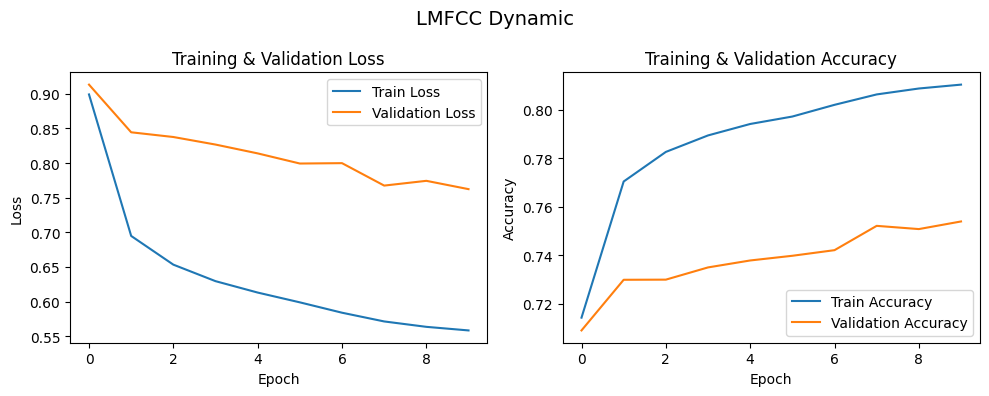

Running experiment with MSPEC Dynamic features...
Using device: cuda
Epoch [1/10] - Train Loss: 0.9514, Acc: 0.6963 - Val Loss: 0.9391, Acc: 0.6981
Epoch [2/10] - Train Loss: 0.7239, Acc: 0.7607 - Val Loss: 0.8834, Acc: 0.7161
Epoch [3/10] - Train Loss: 0.6760, Acc: 0.7748 - Val Loss: 0.8633, Acc: 0.7212
Epoch [4/10] - Train Loss: 0.6497, Acc: 0.7827 - Val Loss: 0.8396, Acc: 0.7308
Epoch [5/10] - Train Loss: 0.6314, Acc: 0.7882 - Val Loss: 0.8606, Acc: 0.7265
Epoch [6/10] - Train Loss: 0.6184, Acc: 0.7926 - Val Loss: 0.8350, Acc: 0.7362
Epoch [7/10] - Train Loss: 0.6080, Acc: 0.7953 - Val Loss: 0.8155, Acc: 0.7401
Epoch [8/10] - Train Loss: 0.5996, Acc: 0.7979 - Val Loss: 0.8262, Acc: 0.7357
Epoch [9/10] - Train Loss: 0.5930, Acc: 0.7999 - Val Loss: 0.8298, Acc: 0.7370
Epoch [10/10] - Train Loss: 0.5874, Acc: 0.8017 - Val Loss: 0.8023, Acc: 0.7442
Test Loss: 0.7302, Test Accuracy: 0.7633


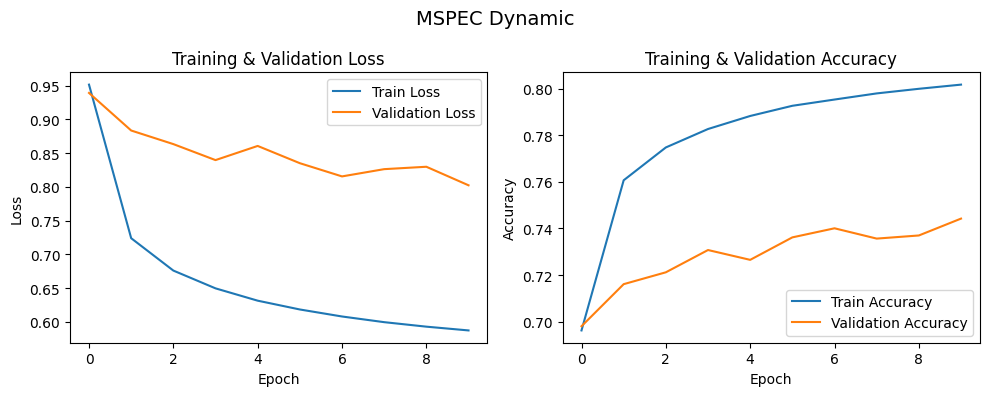

Running experiment with LMFCC Static features...
Using device: cuda
Epoch [1/10] - Train Loss: 1.3362, Acc: 0.5928 - Val Loss: 1.3697, Acc: 0.5760
Epoch [2/10] - Train Loss: 1.1946, Acc: 0.6266 - Val Loss: 1.3379, Acc: 0.5845
Epoch [3/10] - Train Loss: 1.1680, Acc: 0.6336 - Val Loss: 1.3381, Acc: 0.5818
Epoch [4/10] - Train Loss: 1.1518, Acc: 0.6380 - Val Loss: 1.3205, Acc: 0.5863
Epoch [5/10] - Train Loss: 1.1409, Acc: 0.6413 - Val Loss: 1.3237, Acc: 0.5863
Epoch [6/10] - Train Loss: 1.1322, Acc: 0.6437 - Val Loss: 1.3239, Acc: 0.5859
Epoch [7/10] - Train Loss: 1.1255, Acc: 0.6453 - Val Loss: 1.3220, Acc: 0.5881
Epoch [8/10] - Train Loss: 1.1206, Acc: 0.6467 - Val Loss: 1.3215, Acc: 0.5899
Epoch [9/10] - Train Loss: 1.1166, Acc: 0.6481 - Val Loss: 1.3117, Acc: 0.5891
Epoch [10/10] - Train Loss: 1.1123, Acc: 0.6490 - Val Loss: 1.3163, Acc: 0.5894
Test Loss: 1.2688, Test Accuracy: 0.6028


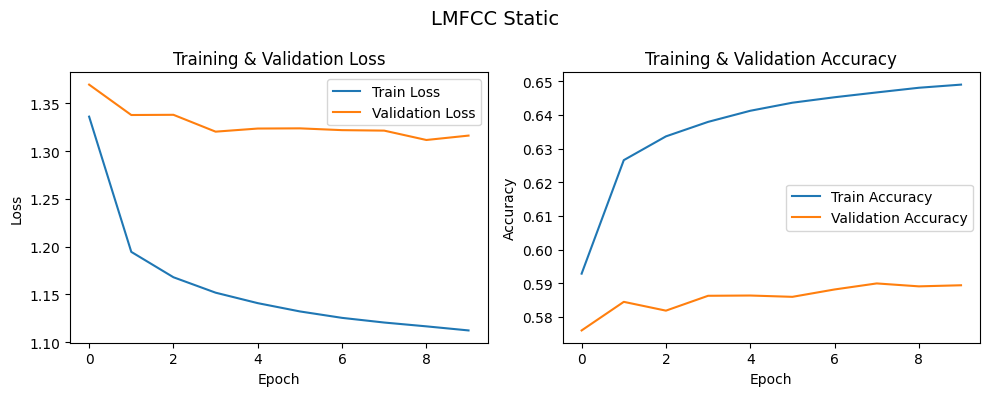

Running experiment with MSPEC Static features...
Using device: cuda
Epoch [1/10] - Train Loss: 1.3355, Acc: 0.5929 - Val Loss: 1.3618, Acc: 0.5789
Epoch [2/10] - Train Loss: 1.1934, Acc: 0.6262 - Val Loss: 1.3452, Acc: 0.5829
Epoch [3/10] - Train Loss: 1.1672, Acc: 0.6336 - Val Loss: 1.3215, Acc: 0.5873
Epoch [4/10] - Train Loss: 1.1514, Acc: 0.6381 - Val Loss: 1.3196, Acc: 0.5879
Epoch [5/10] - Train Loss: 1.1409, Acc: 0.6410 - Val Loss: 1.3142, Acc: 0.5892
Epoch [6/10] - Train Loss: 1.1326, Acc: 0.6429 - Val Loss: 1.3088, Acc: 0.5891
Epoch [7/10] - Train Loss: 1.1259, Acc: 0.6450 - Val Loss: 1.3059, Acc: 0.5906
Epoch [8/10] - Train Loss: 1.1213, Acc: 0.6463 - Val Loss: 1.3068, Acc: 0.5878
Epoch [9/10] - Train Loss: 1.1169, Acc: 0.6475 - Val Loss: 1.3129, Acc: 0.5888
Epoch [10/10] - Train Loss: 1.1133, Acc: 0.6486 - Val Loss: 1.3067, Acc: 0.5919
Test Loss: 1.2638, Test Accuracy: 0.6048


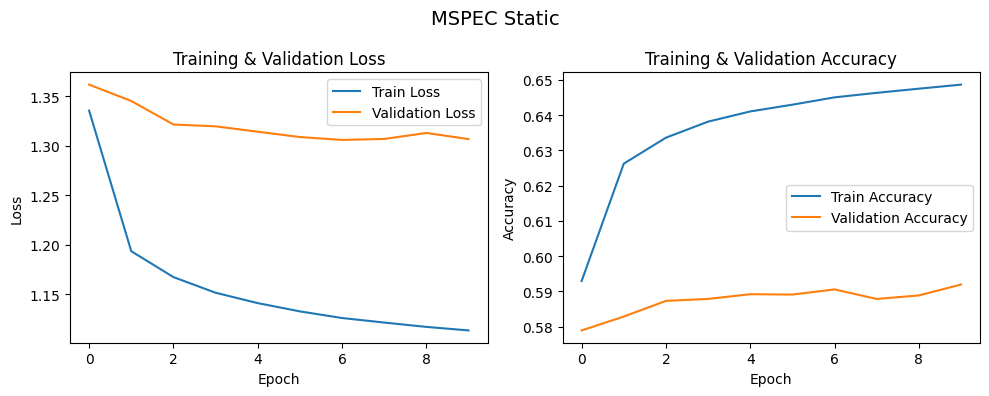

In [5]:
results = []

for t, s, p in paths:
    print(f"Running experiment with {t} features...")

    d = np.load(p, allow_pickle=True)
    train_acc, val_acc, test_acc = run_experiment(d, len(stateList), title=t, save_path=s)
    results.append((t, train_acc, val_acc, test_acc))

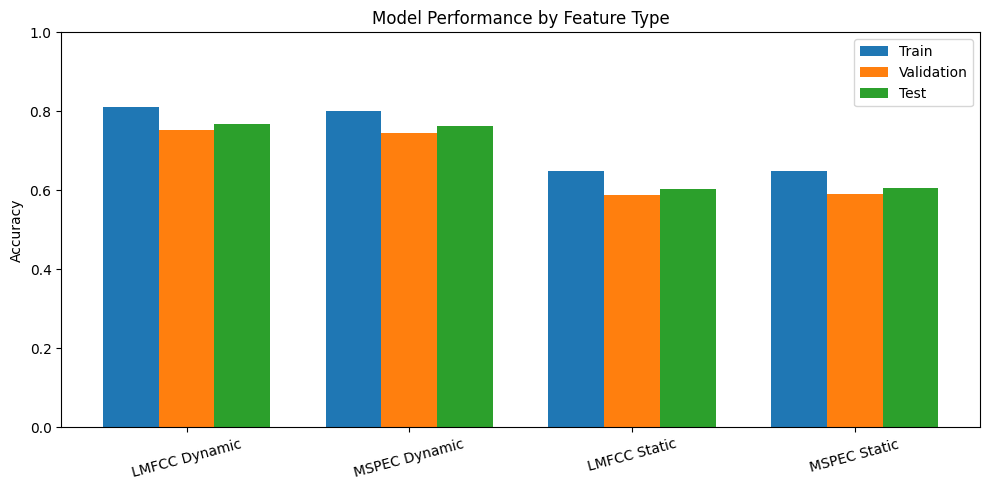

In [6]:
labels = [r[0] for r in results]
train_accs = [r[1] for r in results]
val_accs = [r[2] for r in results]
test_accs = [r[3] for r in results]

x = np.arange(len(labels))  # label locations
width = 0.25  # width of the bars

plt.figure(figsize=(10, 5))
plt.bar(x - width, train_accs, width, label='Train')
plt.bar(x, val_accs, width, label='Validation')
plt.bar(x + width, test_accs, width, label='Test')

plt.ylabel('Accuracy')
plt.title('Model Performance by Feature Type')
plt.xticks(x, labels, rotation=15)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

### 5.1 Detailed Evaluation

In [6]:
path = paths[0]
print(f"Loading data from {path}...")
d = np.load(path[2], allow_pickle=True)

Loading data from ('LMFCC Dynamic', 'data/models/lmfcc_dynamic.pth', 'data/preprocessed/lmfcc_dynamic_standard.npz')...


Using device: cuda
Epoch [1/10] - Train Loss: 0.8973, Acc: 0.7151 - Val Loss: 0.8864, Acc: 0.7161
Epoch [2/10] - Train Loss: 0.6934, Acc: 0.7701 - Val Loss: 0.8521, Acc: 0.7264
Epoch [3/10] - Train Loss: 0.6481, Acc: 0.7827 - Val Loss: 0.8242, Acc: 0.7351
Epoch [4/10] - Train Loss: 0.6213, Acc: 0.7899 - Val Loss: 0.8042, Acc: 0.7389
Epoch [5/10] - Train Loss: 0.6002, Acc: 0.7967 - Val Loss: 0.8161, Acc: 0.7400
Epoch [6/10] - Train Loss: 0.5854, Acc: 0.8014 - Val Loss: 0.7861, Acc: 0.7469
Epoch [7/10] - Train Loss: 0.5747, Acc: 0.8049 - Val Loss: 0.7709, Acc: 0.7507
Epoch [8/10] - Train Loss: 0.5672, Acc: 0.8068 - Val Loss: 0.7727, Acc: 0.7529
Epoch [9/10] - Train Loss: 0.5615, Acc: 0.8087 - Val Loss: 0.7800, Acc: 0.7487
Epoch [10/10] - Train Loss: 0.5566, Acc: 0.8104 - Val Loss: 0.7838, Acc: 0.7479
Model saved at data/models/lmfcc_dynamic.pth
Test Loss: 0.7148, Test Accuracy: 0.7653


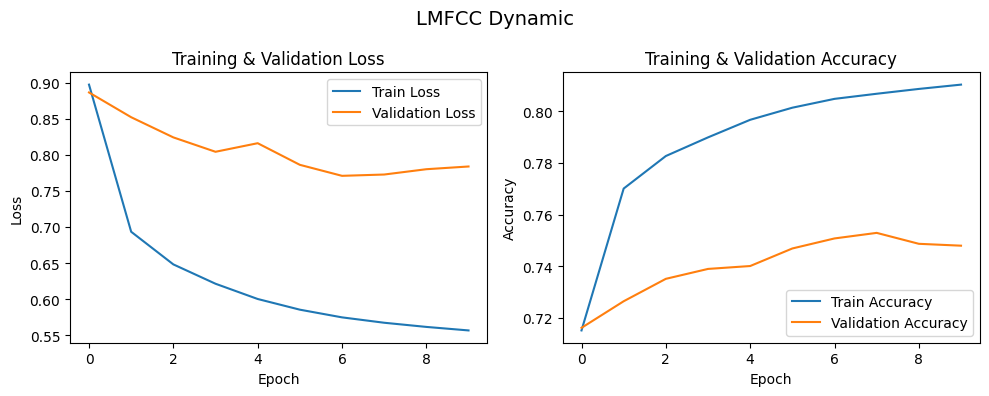

(0.8103751878549666, 0.747936637514481, 0.7652824401086041)

In [12]:
run_experiment(d, len(stateList), title=path[0], save_path=path[1])

In [7]:
data_module = MFCCDataModule(d, len(stateList), batch_size=512)
train_loader, val_loader, test_loader = data_module.get_dataloaders()

input_dim = data_module.input_dim

dnn_model = DNN(input_dim, len(stateList))

optimizer = torch.optim.Adam(dnn_model.parameters(), lr=1e-3, weight_decay=1e-4)

trainer = Trainer(model=dnn_model, optimizer=optimizer, path=path[1])
trainer.load_model()

# Evaluate on test set
avg_test_loss, test_accuracy, y_true, y_pred = trainer.evaluate(test_loader)
print(f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Using device: cuda
Model loaded successfully!
Test Loss: 0.7148, Test Accuracy: 0.7653


### Plotting Posteriors

In [11]:
logits = trainer.predict(test_loader)

# Assuming logits is a numpy array of shape (N, 61)
logits_tensor = torch.tensor(logits)  # if still in NumPy
posteriors = torch.softmax(logits_tensor, dim=1).numpy()

In [18]:
def plot_posteriors(start_frame, end_frame, post, targets):
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(post[start_frame: end_frame].T, cmap='viridis', shading='auto')
    plt.plot(targets[start_frame: end_frame], color='r', linewidth=1.5, label='Target')
    plt.colorbar(label='Posterior Probability')
    plt.xlabel('Frame Index')
    plt.ylabel('State Index')
    plt.title('Posterior Probabilities with Ground Truth Overlay')
    plt.legend()
    plt.tight_layout()
    plt.show()

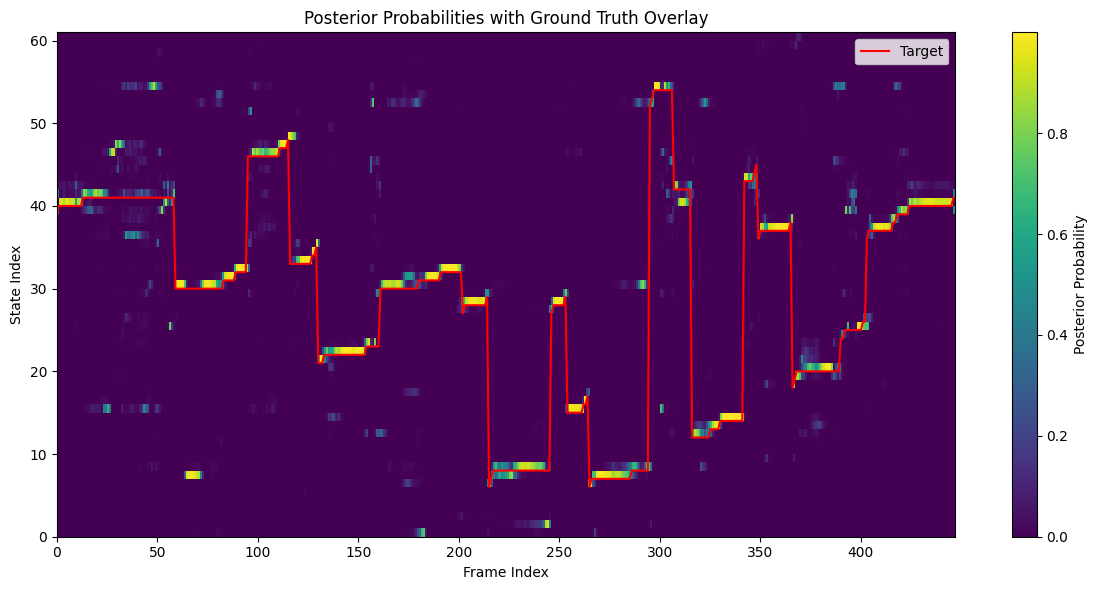

In [19]:
plot_posteriors(0, 447, posteriors, y_true)

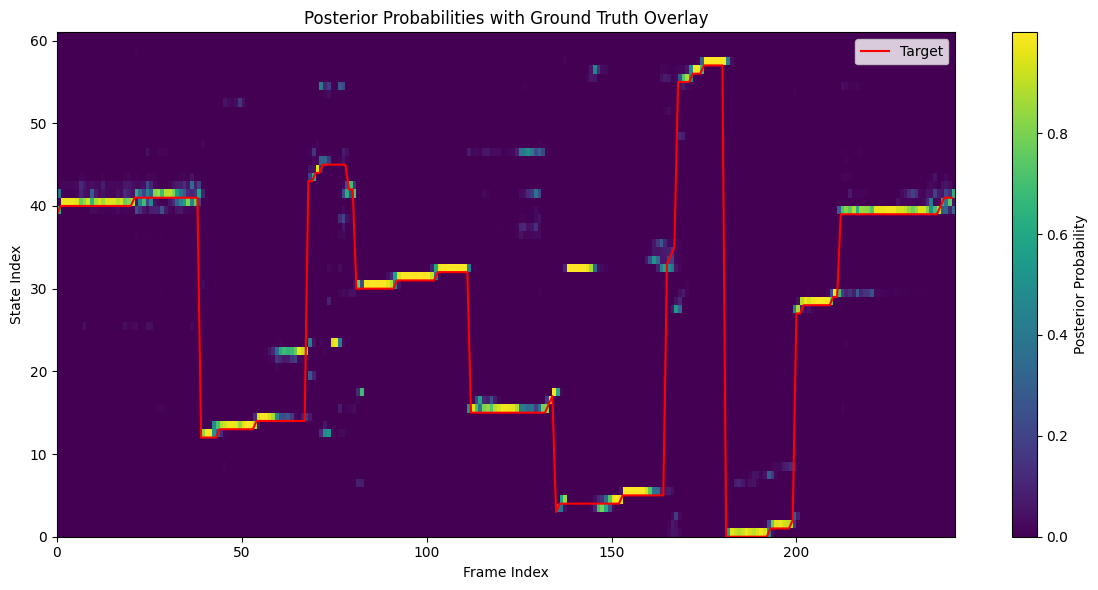

In [20]:
plot_posteriors(447, 447 + 243, posteriors, y_true)

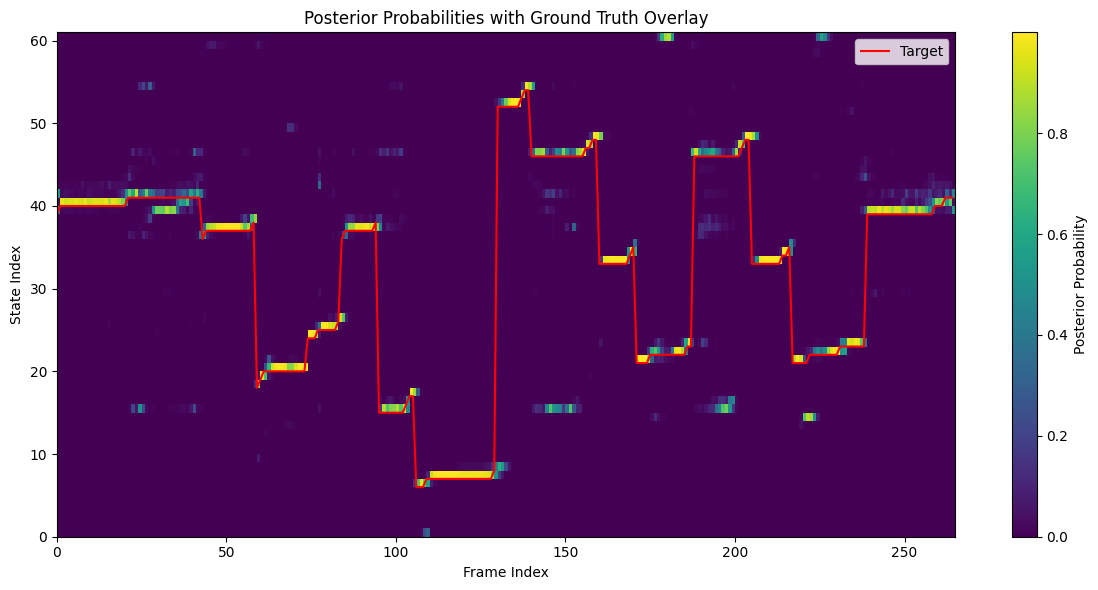

In [21]:
plot_posteriors(447 + 243, 447 + 243 + 265, posteriors, y_true)

### State level confusion matrix

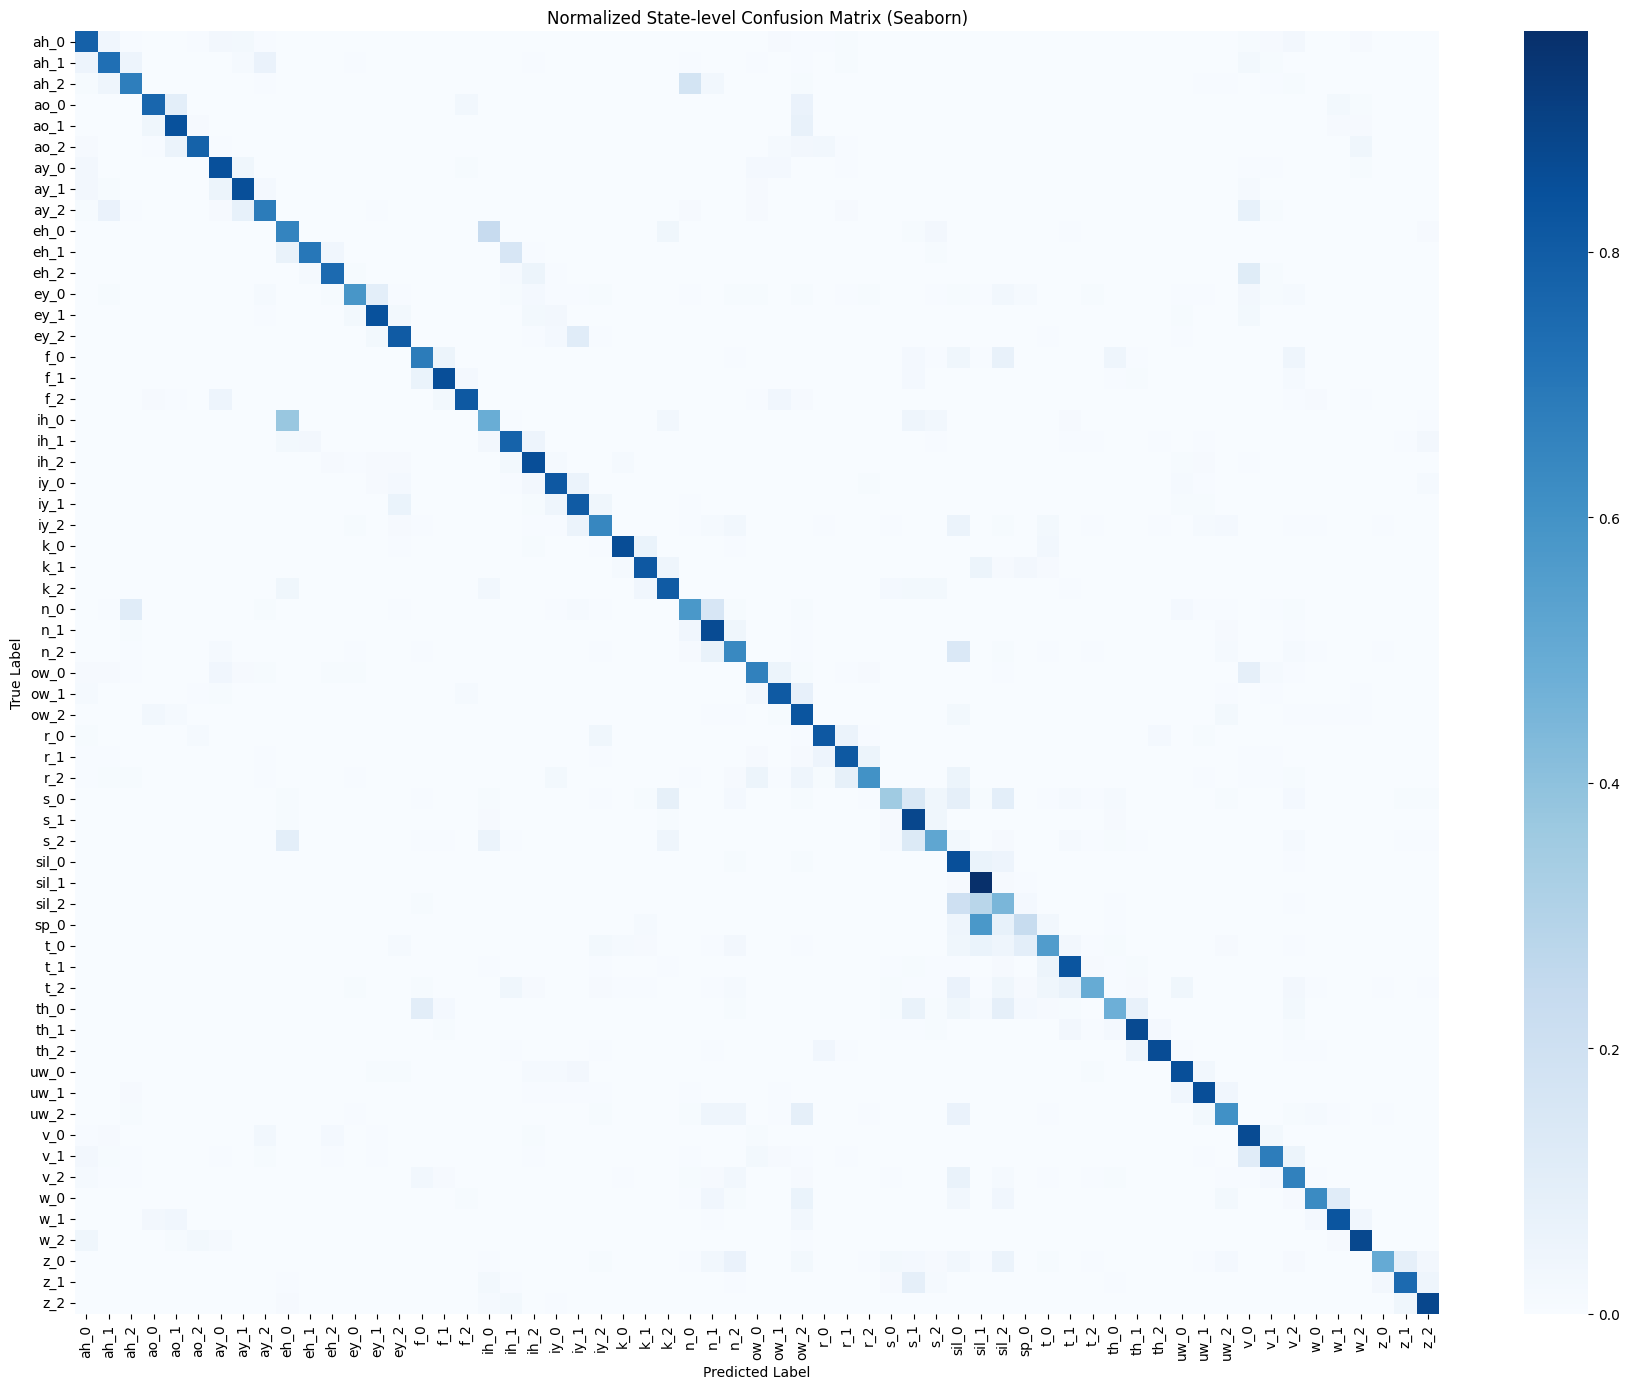

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=range(len(stateList)))

# Normalize by row (true labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)

# Plot using seaborn
plt.figure(figsize=(18, 14))
sns.heatmap(cm_normalized, xticklabels=stateList, yticklabels=stateList,
            cmap="Blues", annot=False, fmt=".2f", cbar=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized State-level Confusion Matrix (Seaborn)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Phoneme Level

In [17]:
idx_to_phoneme = [s.split('_')[0] for s in stateList]

phoneme_true = [idx_to_phoneme[i] for i in y_true]
phoneme_pred = [idx_to_phoneme[i] for i in y_pred]

# compute phoneme accuracy
phoneme_accuracy = np.mean(np.array(phoneme_true) == np.array(phoneme_pred))
print(f"Phoneme Accuracy: {phoneme_accuracy:.4f}")

Phoneme Accuracy: 0.8543


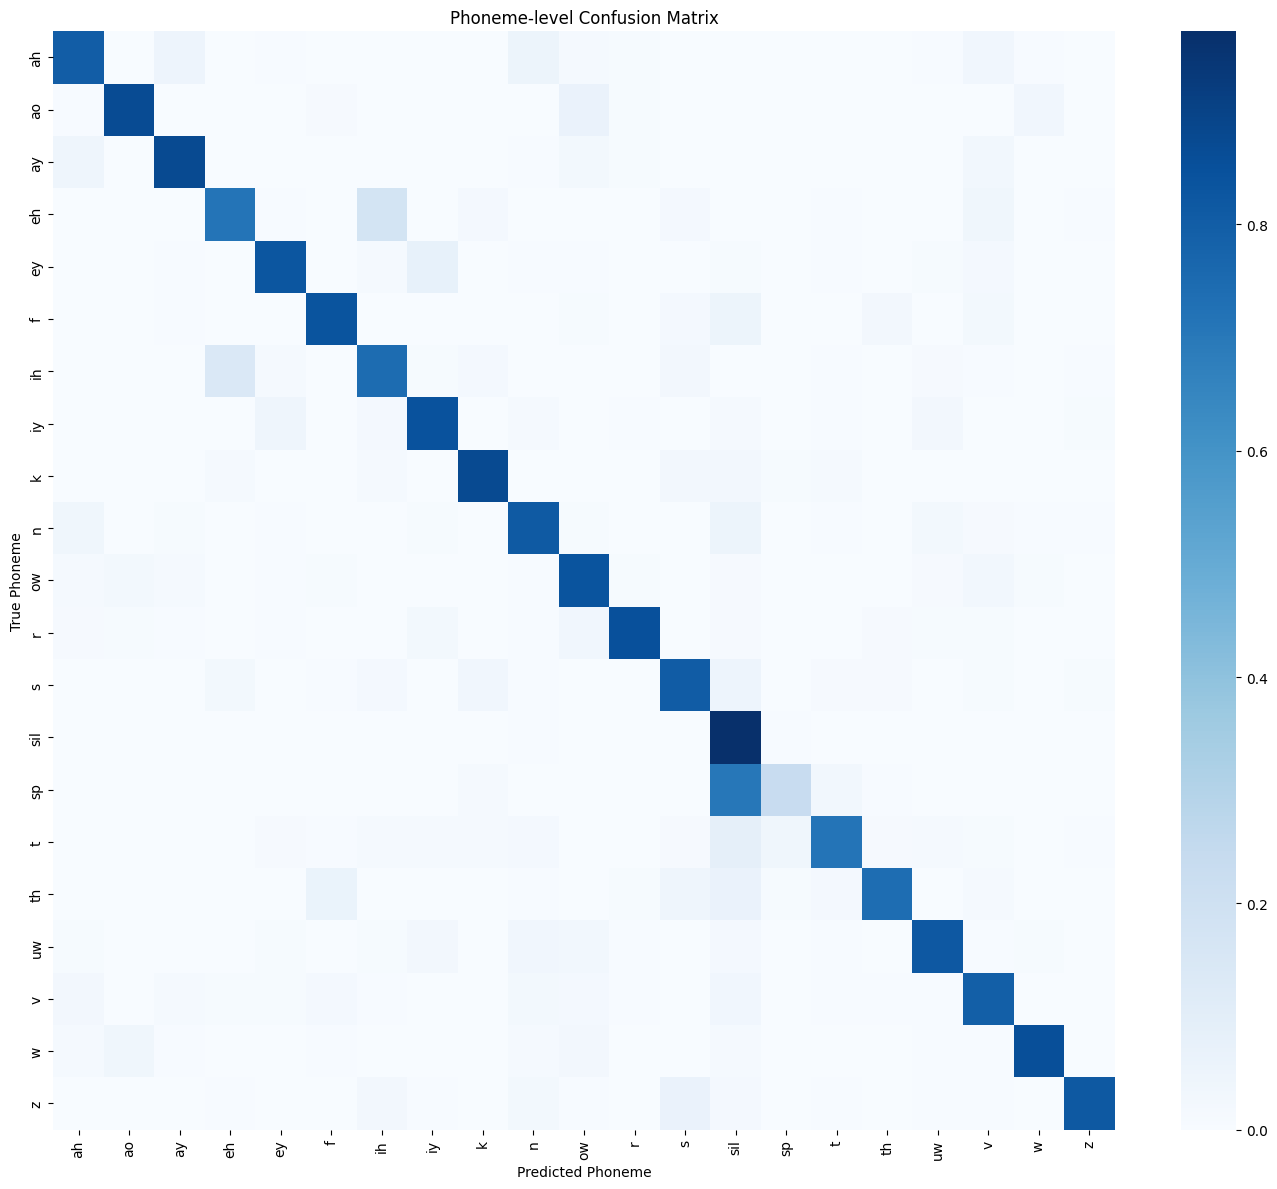

In [28]:
phonemes = sorted(set(idx_to_phoneme))
phoneme_to_idx = {ph: i for i, ph in enumerate(phonemes)}

# Map phoneme labels to indices for sklearn
y_true_phoneme_idx = [phoneme_to_idx[p] for p in phoneme_true]
y_pred_phoneme_idx = [phoneme_to_idx[p] for p in phoneme_pred]

# Compute confusion matrix
cm_phoneme = confusion_matrix(y_true_phoneme_idx, y_pred_phoneme_idx, labels=range(len(phonemes)))

# Normalize
cm_norm = cm_phoneme.astype('float') / cm_phoneme.sum(axis=1, keepdims=True)

# Plot
plt.figure(figsize=(14, 12))
sns.heatmap(cm_norm, xticklabels=phonemes, yticklabels=phonemes,
            cmap="Blues", annot=False, fmt=".2f", cbar=True)
plt.xlabel("Predicted Phoneme")
plt.ylabel("True Phoneme")
plt.title("Phoneme-level Confusion Matrix")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Edit distance at state level

convert the frame-by-frame sequence of classifications into a
transcription by merging all the consequent identical states, for example ox_0 ox_0 ox_0
ox_1 ox_1 ox_2 ox_2 ox_2 ox_2... becomes ox_0 ox_1 ox_2 ....

In [12]:
def state_transcribe(items):
    """
    Convert a sequence of states into a transcription by merging consecutive identical states.
    """
    # Initialize an empty list to store the transcription
    transcription = []
    # Iterate through the sequence of states
    for i in range(len(items)):
        # If it's the first state or different from the previous one, add it to the transcription
        if i == 0 or items[i] != items[i - 1]:
            transcription.append(stateList[items[i]])
    # Return the transcription as a string
    return transcription

y_true_transcribed = state_transcribe(y_true)
y_pred_transcribed = state_transcribe(y_pred)

In [13]:
y_pred_transcribed

['sil_0',
 'sil_1',
 'sil_2',
 'f_0',
 'th_0',
 'th_1',
 's_0',
 'sil_2',
 'f_0',
 'sil_2',
 'v_2',
 'r_2',
 'th_0',
 'sil_0',
 'sil_1',
 'sp_0',
 'k_1',
 'sil_1',
 'sil_2',
 'ow_0',
 'ay_1',
 'ow_0',
 'ow_1',
 'ow_2',
 'uw_2',
 'th_0',
 'th_1',
 'th_2',
 'r_0',
 'r_1',
 'r_2',
 'iy_0',
 'iy_1',
 'iy_2',
 't_1',
 'v_0',
 'iy_2',
 'n_2',
 'ow_0',
 'ow_1',
 'v_0',
 'ah_0',
 'ow_1',
 'ow_2',
 'n_1',
 'n_2',
 'ay_0',
 'ay_1',
 'ay_2',
 'ay_1',
 'ay_2',
 'ay_1',
 'ay_2',
 'ah_1',
 'n_0',
 'n_1',
 'n_2',
 'f_0',
 'f_1',
 'ay_0',
 'ay_1',
 'ay_2',
 'ow_0',
 'ay_2',
 'v_0',
 'v_2',
 'f_0',
 'v_2',
 't_2',
 'sp_0',
 'sil_1',
 'sp_0',
 'ey_0',
 'v_0',
 'ey_0',
 'ey_1',
 'ey_2',
 't_0',
 's_0',
 's_1',
 's_2',
 'ih_0',
 'ih_1',
 'iy_0',
 'ih_2',
 'ih_1',
 'v_2',
 'ih_2',
 'k_0',
 'v_2',
 'sil_0',
 'k_1',
 'sil_0',
 'sil_2',
 'sil_0',
 'k_1',
 's_2',
 's_1',
 's_2',
 'sil_0',
 'sil_1',
 'sil_0',
 'sil_1',
 'sil_2',
 'sil_1',
 'sil_2',
 'sil_1',
 'sil_2',
 'sil_1',
 'sil_2',
 'ey_0',
 'ey_1',
 'ey_

In [15]:
from Levenshtein import distance as levenshtein_distance

# Compute edit distance and PER
ed = levenshtein_distance(y_true_transcribed, y_pred_transcribed)
per_state = ed / len(y_true_transcribed)

print(f"State-level PER (Phone Error Rate): {per_state:.4f}")

State-level PER (Phone Error Rate): 0.4607


In [20]:
def phoneme_transcribe(items):
    """
    Convert a sequence of states into a transcription by merging consecutive identical states.
    """
    # Initialize an empty list to store the transcription
    transcription = []
    # Iterate through the sequence of states
    for i in range(len(items)):
        # If it's the first state or different from the previous one, add it to the transcription
        if i == 0 or items[i] != items[i - 1]:
            transcription.append(items[i])
    # Return the transcription as a string
    return transcription

phoneme_true_transcribed = phoneme_transcribe(phoneme_true)
phoneme_pred_transcribed = phoneme_transcribe(phoneme_pred)

In [22]:
len(phoneme_true_transcribed)

96817

In [23]:
len(phoneme_pred_transcribed)

186390

In [24]:
from Levenshtein import distance as levenshtein_distance

# Compute edit distance and PER
ed = levenshtein_distance(phoneme_true_transcribed, phoneme_pred_transcribed)
per_state = ed / len(phoneme_true_transcribed)

print(f"State-level PER (Phone Error Rate): {per_state:.4f}")

State-level PER (Phone Error Rate): 0.9531
